In [1]:
import pandas as pd
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
DANGER_DF_FILEPATH = "../../pipeline_data/2019/danger_by_node_id.pkl.gz"
GRAPH_FILEPATH = "../../pipeline_data/2019/target_map_consolidated.graphml"

In [3]:
danger_node_df = pd.read_pickle(DANGER_DF_FILEPATH)

In [4]:
G = ox.io.load_graphml(GRAPH_FILEPATH)

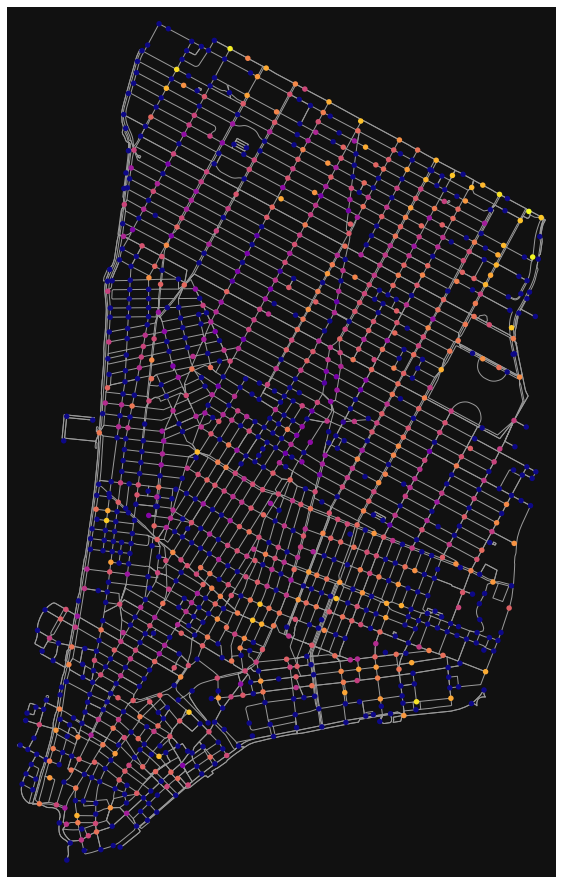

(<Figure size 1152x1152 with 1 Axes>, <AxesSubplot:>)

In [5]:
nx.set_node_attributes(G, danger_node_df.DANGER, "danger")

nc = ox.plot.get_node_colors_by_attr(G, "danger", cmap="plasma")

ox.plot.plot_graph(
    G,
    figsize=(16, 16),
    node_size=30,
    node_color=nc
)

In [6]:
len(G.nodes)

1263

In [7]:
node_df = pd.DataFrame.from_dict({i: G.nodes[i] for i in range(len(G.nodes))}, orient="index")

In [8]:
node_df

,osmid_original,y,x,street_count,lon,lat,danger,highway
0,42421828,4.508770e+06,586459.280719,3.0,-73.976212,40.725326,0.000000,NaN
1,42430942,4.508722e+06,586548.367848,4.0,-73.975164,40.724877,0.000000,traffic_signals
2,42430938,4.508831e+06,586346.713008,4.0,-73.977536,40.725883,2.768670,traffic_signals
3,"[42421837, 5481976931, 5481976926]",4.508908e+06,586564.151727,NaN,NaN,NaN,0.000000,NaN
4,"[42421877, 8475999052, 42433354, 42437949, 830...",4.509534e+06,584759.228753,NaN,NaN,NaN,3.006661,NaN
...,...,...,...,...,...,...,...,...
1258,8095882130,4.507237e+06,583663.063274,3.0,-74.009523,40.711806,3.589068,NaN
1259,42446678,4.512180e+06,583964.409871,3.0,-74.005293,40.756296,0.000000,NaN
1260,"[8288262780, 8288262779]",4.509302e+06,583287.131348,NaN,NaN,NaN,0.000000,NaN
1261,8288560711,4.511086e+06,583721.549163,3.0,-74.008316,40.746469,0.000000,NaN


In [9]:
sum(node_df["lon"].isna())

478

Need to use x and y instead of lat and lon - those details are lost when consolidating nodes and too many nodes were consolated in our final (478 of 1263 nodes have lon as NA)

In [10]:
G.nodes[0]["osmid_original"]

'42421828'

In [11]:
len(list(G.nodes))

1263

In [12]:
danger_node_df

,DANGER,CRASH_AVG,OLD_NODE_IDS,CENSUS_TRACT_ID
0,0.000000,0.000000,[42421828],002800
1,0.000000,0.000000,[42430942],002400
2,2.768670,0.000872,[42430938],002800
3,0.000000,0.000000,"[42421837, 5481976931, 5481976926]",002800
4,3.006661,0.001058,"[42421877, 8475999052, 42433354, 42437949, 830...",006300
...,...,...,...,...
1258,3.589068,0.001789,[8095882130],001300
1259,0.000000,0.000000,[42446678],009900
1260,0.000000,0.000000,"[8288262780, 8288262779]",006900
1261,0.000000,0.000000,[8288560711],009900


In [13]:
danger_node_df["OLD_NODE_IDS"]

0                                              [42421828]
1                                              [42430942]
2                                              [42430938]
3                      [42421837, 5481976931, 5481976926]
4       [42421877, 8475999052, 42433354, 42437949, 830...
                              ...                        
1258                                         [8095882130]
1259                                           [42446678]
1260                             [8288262780, 8288262779]
1261                                         [8288560711]
1262                                         [8288560714]
Name: OLD_NODE_IDS, Length: 1263, dtype: object

In [14]:
danger_node_df["id"] = danger_node_df.index

In [15]:
danger_node_df

,DANGER,CRASH_AVG,OLD_NODE_IDS,CENSUS_TRACT_ID,id
0,0.000000,0.000000,[42421828],002800,0
1,0.000000,0.000000,[42430942],002400,1
2,2.768670,0.000872,[42430938],002800,2
3,0.000000,0.000000,"[42421837, 5481976931, 5481976926]",002800,3
4,3.006661,0.001058,"[42421877, 8475999052, 42433354, 42437949, 830...",006300,4
...,...,...,...,...,...
1258,3.589068,0.001789,[8095882130],001300,1258
1259,0.000000,0.000000,[42446678],009900,1259
1260,0.000000,0.000000,"[8288262780, 8288262779]",006900,1260
1261,0.000000,0.000000,[8288560711],009900,1261


In [16]:
type(danger_node_df["OLD_NODE_IDS"][0][0])

int

# Calculating bike route

In [17]:
corners = [
    (40.75739, -74.00591), # West 34th
    (40.7432, -73.97139), # East 34th
    (40.73549, -73.97182), # About East 23rd
    (40.7283, -73.9706), # About East 16th
    (40.7092, -73.976), # Navy Yard-ish
    (40.7047, -73.9987), # Brooklyn Bridge-ish
    (40.696, -74.0174), # The Battery
    (40.7272, -74.0249), # Holland Tunnel
    (40.75739, -74.00591), # West 34th
]

corners_new = [(i[1], i[0]) for i in corners]

from shapely.geometry import Polygon

boundaries = Polygon(corners_new)

boundaries

old_G = ox.graph.graph_from_polygon(boundaries, network_type="bike")

/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [18]:
old_G.nodes[42421828]

{'y': 40.725326, 'x': -73.976212, 'street_count': 3}

In [19]:
starting_point_coord = (40.711760159805294, -73.99191941246944)
ending_point_coord = (40.74693334962695, -74.00451674926828)

In [20]:
orig = ox.distance.nearest_nodes(old_G, starting_point_coord[1], starting_point_coord[0], return_dist=False)
dest = ox.distance.nearest_nodes(old_G, ending_point_coord[1], ending_point_coord[0], return_dist=False)

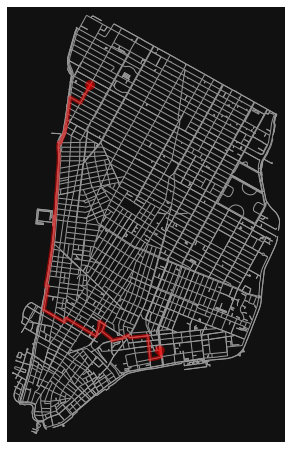

In [21]:
route = ox.shortest_path(old_G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(old_G, route, node_size=0)
ax.scatter(starting_point_coord[1], starting_point_coord[0], marker="x", c="red")
plt.show()

In [22]:
G.nodes[0]

{'osmid_original': '42421828',
 'y': 4508770.370461497,
 'x': 586459.2807188109,
 'street_count': 3,
 'lon': -73.976212,
 'lat': 40.725326,
 'danger': 0.0}

In [23]:
G.nodes[3]

{'osmid_original': '[42421837, 5481976931, 5481976926]',
 'x': 586564.1517271118,
 'y': 4508907.622139629,
 'danger': 0.0}

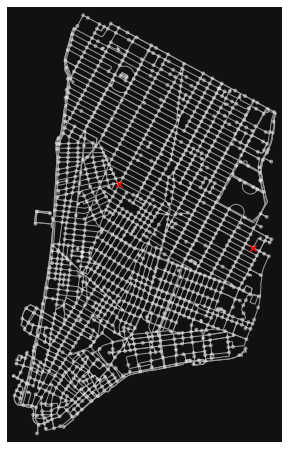

In [24]:
fig, ax = ox.plot.plot_graph(G, node_alpha=0.5, show=False)
ax.scatter(G.nodes[0]["x"], G.nodes[0]["y"], marker="x", c="red")
ax.scatter(G.nodes[5]["x"], G.nodes[5]["y"], marker="x", c="red")
plt.show()

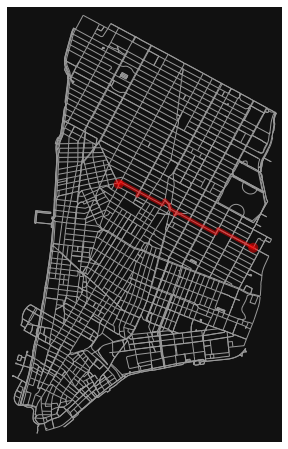

In [25]:
# The "weight" argument minimizes based on edge, not node attributes, so we would have to add a danger attribute to
# each edge in the graph
route = ox.shortest_path(G, 0, 5, weight="danger")

fig, ax = ox.plot_graph_route(G, route, node_size=0)
ax.scatter(G.nodes[0]["x"], G.nodes[0]["y"], marker="x", c="red")
ax.scatter(G.nodes[5]["x"], G.nodes[5]["y"], marker="x", c="red")
plt.show()

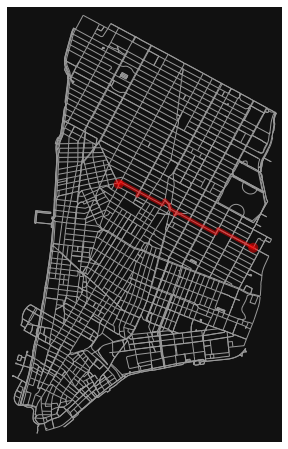

In [26]:
route = ox.shortest_path(G, 0, 5, weight="travel_time")

fig, ax = ox.plot_graph_route(G, route, node_size=0)
ax.scatter(G.nodes[0]["x"], G.nodes[0]["y"], marker="x", c="red")
ax.scatter(G.nodes[5]["x"], G.nodes[5]["y"], marker="x", c="red")
plt.show()

In [27]:
ox.utils_graph.get_route_edge_attributes(G, route)

[{'osmid': 194923763,
  'name': 'East 10th Street',
  'highway': 'residential',
  'maxspeed': '20 mph',
  'oneway': False,
  'length': 127.63300000000001,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd0382a8a00>,
  'u_original': '42421828',
  'v_original': '42430938'},
 {'osmid': 25166891,
  'name': 'East 10th Street',
  'highway': 'residential',
  'maxspeed': '20 mph',
  'oneway': False,
  'length': 227.64499999999998,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd038544940>,
  'u_original': '42430938',
  'v_original': '42430924'},
 {'osmid': 25166891,
  'name': 'East 10th Street',
  'highway': 'residential',
  'maxspeed': '20 mph',
  'oneway': False,
  'length': 223.964,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd04cd340a0>,
  'u_original': '42430924',
  'v_original': '42430914'},
 {'osmid': 584971530,
  'name': 'Avenue A',
  'highway': 'secondary',
  'maxspeed': '20 mph',
  'oneway': False,
  'length': 74.42,
  'geometry': <shapely.

# Further work
* Add danger attribute to edges so that we can plot/calculate route for minimal danger vs shortest time
* Update CRS of example nodes to fit to simplified graph
    * EPSG2263 to EPSG4326

In [28]:
import geopandas as gpd

In [29]:
from shapely.geometry import Point
d = {
    'col1': ['start', 'end'],
    'geometry': [
        Point(starting_point_coord[1], starting_point_coord[0]),
        Point(ending_point_coord[1], ending_point_coord[0])
    ]
}

gdf = gpd.GeoDataFrame(d, crs="EPSG:2263")

In [30]:
gdf

,col1,geometry
0,start,POINT (-73.992 40.712)
1,end,POINT (-74.005 40.747)


In [31]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [32]:
gdf.to_crs("EPSG:4326").crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
gdf.to_crs("EPSG:4326")

,col1,geometry
0,start,POINT (-77.51985 40.11249)
1,end,POINT (-77.51985 40.11249)


In [34]:
G.graph["crs"]

'+proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs'

In [35]:
list(ox.projection.project_geometry(Point(starting_point_coord[1], starting_point_coord[0]))[0].coords)

[(585150.0488574493, 4507249.12450684)]

I couldn't get this all to work by projecting the graph or creating a GDF with points and projecting them to WSG84 (EPSG:4326), but I'm able to get them to align using `ox.projection.project_geometry`. Error `ValueError: Geometry must be unprojected to calculate UTM zone` has come up many times and I'm not sure what that means. For example...

In [36]:
ox.projection.project_gdf(gdf)

ValueError: Geometry must be unprojected to calculate UTM zone

In [37]:
starting_point_projected = list(
    ox.projection.project_geometry(
        Point(starting_point_coord[1], starting_point_coord[0])
    )[0].coords
)

ending_point_projected = list(
    ox.projection.project_geometry(
        Point(ending_point_coord[1], ending_point_coord[0])
    )[0].coords
)

In [38]:
starting_point_projected

[(585150.0488574493, 4507249.12450684)]

In [39]:
ending_point_projected

[(584041.6991611086, 4511141.450915662)]

In [40]:
orig = ox.distance.nearest_nodes(G, starting_point_projected[0][1], starting_point_projected[0][0], return_dist=False)
dest = ox.distance.nearest_nodes(G, ending_point_projected[0][1], ending_point_projected[0][0], return_dist=False)

In [41]:
orig

1186

In [42]:
dest

1186

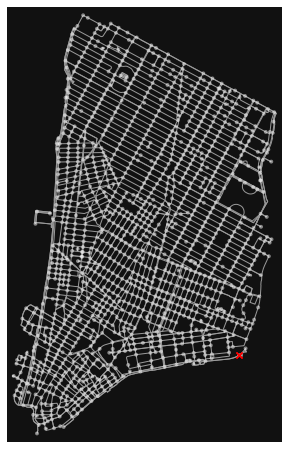

In [43]:
fig, ax = ox.plot.plot_graph(G, node_alpha=0.5, show=False)
ax.scatter(G.nodes[1186]["x"], G.nodes[1186]["y"], marker="x", c="red")
ax.scatter(G.nodes[1186]["x"], G.nodes[1186]["y"], marker="x", c="red")
plt.show()

That clearly also didn't work. I read up more on the error so let's try the following (https://stackoverflow.com/questions/42751748/using-python-to-project-lat-lon-geometry-to-utm)

In [44]:
starting_point_coord

(40.711760159805294, -73.99191941246944)

In [45]:
ending_point_coord

(40.74693334962695, -74.00451674926828)

In [46]:
G.graph["crs"]

'+proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs'

In [47]:
d = {
    'col1': ['start', 'end'],
    'geometry': [
        Point(starting_point_coord[1], starting_point_coord[0]),
        Point(ending_point_coord[1], ending_point_coord[0])
    ]
}

gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")

From: https://epsg.io/32618

In [48]:
gdf.to_crs("EPSG:32618")

,col1,geometry
0,start,POINT (585150.049 4507249.125)
1,end,POINT (584041.699 4511141.451)


In [49]:
orig = ox.distance.nearest_nodes(G, 585150.049, 4507249.125, return_dist=False)
dest = ox.distance.nearest_nodes(G, 584041.699, 4511141.451, return_dist=False)

In [50]:
orig

1129

In [51]:
dest

721

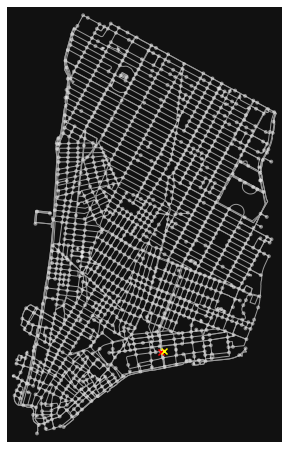

In [52]:
fig, ax = ox.plot.plot_graph(G, node_alpha=0.5, show=False)
ax.scatter(G.nodes[1129]["x"], G.nodes[1129]["y"], marker="x", c="red")
ax.scatter(585150.049, 4507249.125, marker="x", c="yellow")
plt.show()

## Summary
In summary, you can take coordinates (lat/lon) from Google Maps and read them into a GDF with CRS of EPSG:4326 (which is also WGS84). You then need to project these points to EPSG:32618 to align with the projected graph

## Next
Now, we will:
* Get two points and plot the route
* Assign the edge attributes for danger 
* Recalculate a route based on the edge danger

### Plot the original route, optimizing for travel time

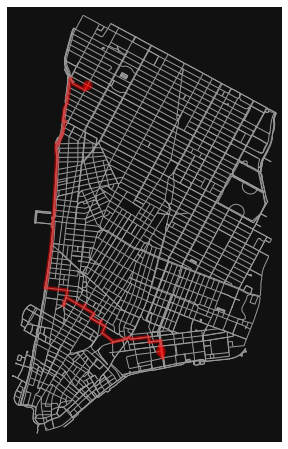

In [53]:
route = ox.shortest_path(G, orig, dest, weight="travel_time")

fig, ax = ox.plot_graph_route(G, route, node_size=0)
ax.scatter(G.nodes[orig]["x"], G.nodes[orig]["y"], marker="x", c="red")
ax.scatter(G.nodes[dest]["x"], G.nodes[dest]["y"], marker="x", c="red")
plt.show()

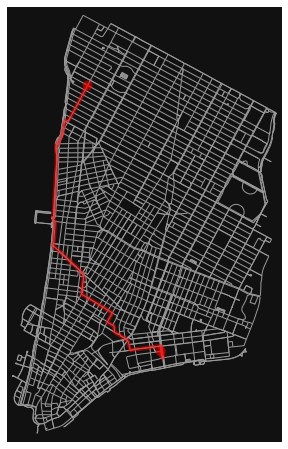

In [54]:
# Show how changing weight to "length" updates the route
route = ox.shortest_path(G, orig, dest, weight="length")

fig, ax = ox.plot_graph_route(G, route, node_size=0)
ax.scatter(G.nodes[orig]["x"], G.nodes[orig]["y"], marker="x", c="red")
ax.scatter(G.nodes[dest]["x"], G.nodes[dest]["y"], marker="x", c="red")
plt.show()

### Assign edge attributes

In [55]:
# Get edge data between two nodes, route[0] and route[1]
G.get_edge_data(route[0], route[1])

{0: {'osmid': 799813242,
  'name': 'Pike Street',
  'highway': 'primary',
  'maxspeed': '25 mph',
  'oneway': True,
  'length': 106.86366095324301,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd04ccbabe0>,
  'u_original': '42448440',
  'v_original': '4207806923'}}

In [56]:
# Get the danger attribute of a given node, route[0]
nx.get_node_attributes(G, "danger")[route[0]]

0.0

In [57]:
nx.get_node_attributes(G, "danger")[route[1]]

0.0

In [58]:
G.edges(route[0])

OutMultiEdgeDataView([(1129, 840)])

In [59]:
G.get_edge_data(1251, 1260)

{0: {'osmid': 249664805,
  'highway': 'service',
  'oneway': False,
  'length': 240.23212293572678,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd04ccb3fd0>,
  'service': 'parking_aisle',
  'u_original': '8288262778',
  'v_original': '8288262779'},
 1: {'osmid': 891757841,
  'highway': 'service',
  'oneway': False,
  'length': 202.3543276965135,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd04ccb3af0>,
  'service': 'parking_aisle',
  'u_original': '8288262777',
  'v_original': '8288262780'}}

In [60]:
G.edges

OutMultiEdgeView([(0, 1, 0), (0, 2, 0), (1, 490, 0), (1, 491, 0), (1, 0, 0), (1, 492, 0), (2, 488, 0), (2, 483, 0), (2, 0, 0), (2, 489, 0), (3, 0, 0), (4, 5, 0), (4, 653, 0), (4, 654, 0), (4, 1253, 0), (5, 6, 0), (5, 620, 0), (5, 621, 0), (5, 416, 0), (6, 417, 0), (6, 418, 0), (7, 500, 0), (7, 498, 0), (7, 548, 0), (7, 636, 0), (8, 9, 0), (8, 12, 0), (8, 13, 0), (8, 10, 0), (9, 8, 0), (9, 362, 0), (9, 364, 0), (10, 8, 0), (10, 11, 0), (10, 11, 1), (10, 694, 0), (10, 1196, 0), (11, 10, 0), (11, 10, 1), (11, 1066, 0), (11, 1066, 1), (12, 8, 0), (12, 282, 0), (12, 552, 0), (12, 13, 0), (12, 555, 0), (13, 12, 0), (13, 556, 0), (13, 8, 0), (14, 15, 0), (14, 16, 0), (14, 14, 0), (15, 14, 0), (15, 921, 0), (15, 921, 1), (15, 1238, 0), (15, 17, 0), (16, 1232, 0), (16, 14, 0), (16, 923, 0), (17, 1160, 0), (18, 19, 0), (18, 20, 0), (18, 21, 0), (18, 22, 0), (19, 18, 0), (19, 24, 0), (19, 24, 1), (19, 23, 0), (19, 23, 1), (19, 22, 0), (20, 18, 0), (20, 1202, 0), (20, 24, 0), (21, 18, 0), (21, 15,

In [61]:
[i for i in G.edges][0]

(0, 1, 0)

In [62]:
G.nodes[1]

{'osmid_original': '42430942',
 'y': 4508721.560816716,
 'x': 586548.3678476026,
 'street_count': 4,
 'highway': 'traffic_signals',
 'lon': -73.975164,
 'lat': 40.724877,
 'danger': 0.0}

In [63]:
G[0][1][0]["danger"] = 0

In [64]:
for i in G.edges:
    node_1 = G.nodes[i[0]]
    node_2 = G.nodes[i[1]]
    
    edge_danger = (node_2["danger"] + node_1["danger"]) / 2
    
    for j in range(i[2]+1):
        G[i[0]][i[1]][j]["danger"] = edge_danger

In [65]:
G.get_edge_data(1251, 1260)

{0: {'osmid': 249664805,
  'highway': 'service',
  'oneway': False,
  'length': 240.23212293572678,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd04ccb3fd0>,
  'service': 'parking_aisle',
  'u_original': '8288262778',
  'v_original': '8288262779',
  'danger': 0.0},
 1: {'osmid': 891757841,
  'highway': 'service',
  'oneway': False,
  'length': 202.3543276965135,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd04ccb3af0>,
  'service': 'parking_aisle',
  'u_original': '8288262777',
  'v_original': '8288262780',
  'danger': 0.0}}

In [66]:
nx.get_node_attributes(G, "danger")[route[0]]

0.0

In [67]:
nx.get_node_attributes(G, "danger")[route[1]]

0.0

In [68]:
G.get_edge_data(route[0], route[1])

{0: {'osmid': 799813242,
  'name': 'Pike Street',
  'highway': 'primary',
  'maxspeed': '25 mph',
  'oneway': True,
  'length': 106.86366095324301,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd04ccbabe0>,
  'u_original': '42448440',
  'v_original': '4207806923',
  'danger': 0.0}}

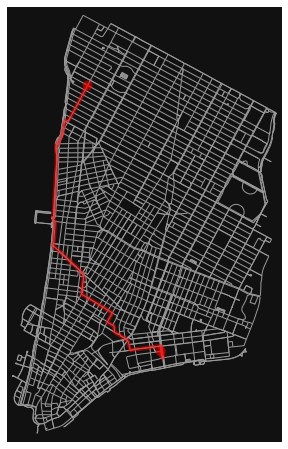

In [69]:
# Look again at optimizing for length
route = ox.shortest_path(G, orig, dest, weight="length")

fig, ax = ox.plot_graph_route(G, route, node_size=0)
ax.scatter(G.nodes[orig]["x"], G.nodes[orig]["y"], marker="x", c="red")
ax.scatter(G.nodes[dest]["x"], G.nodes[dest]["y"], marker="x", c="red")
plt.show()

In [70]:
# Using the node danger as a proxy for the calculated route danger (easier than extracting all edge dangers)
sum([nx.get_node_attributes(G, "danger")[i] for i in route])

60.48021301606287

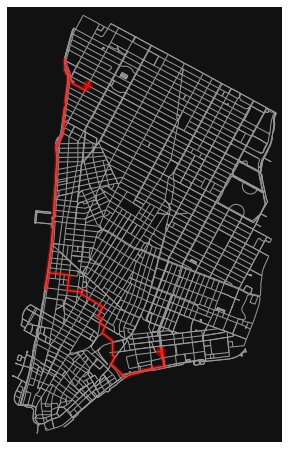

In [71]:
# Now optimize for danger
route = ox.shortest_path(G, orig, dest, weight="danger")

fig, ax = ox.plot_graph_route(G, route, node_size=0)
ax.scatter(G.nodes[orig]["x"], G.nodes[orig]["y"], marker="x", c="red")
ax.scatter(G.nodes[dest]["x"], G.nodes[dest]["y"], marker="x", c="red")
plt.show()

In [72]:
sum([nx.get_node_attributes(G, "danger")[i] for i in route])

38.92497907068537

In [73]:
G.get_edge_data(route[0], route[1])

{0: {'osmid': 799813242,
  'name': 'Pike Street',
  'highway': 'primary',
  'maxspeed': '25 mph',
  'oneway': True,
  'length': 106.86366095324301,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd04ccbabe0>,
  'u_original': '42448440',
  'v_original': '4207806923',
  'danger': 0.0}}

In [74]:
G.get_edge_data(route[1], route[2])

{0: {'osmid': 452098018,
  'highway': 'cycleway',
  'oneway': False,
  'length': 136.18625095228552,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd038b8cac0>,
  'u_original': '7480515821',
  'v_original': '4489003010',
  'danger': 0.0},
 1: {'osmid': [420890085, 799833495],
  'name': 'Pike Slip',
  'highway': 'primary',
  'maxspeed': '25 mph',
  'oneway': True,
  'length': 147.9344486959096,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd038b8cb80>,
  'u_original': '4207806923',
  'v_original': '42444123',
  'danger': 0.0}}

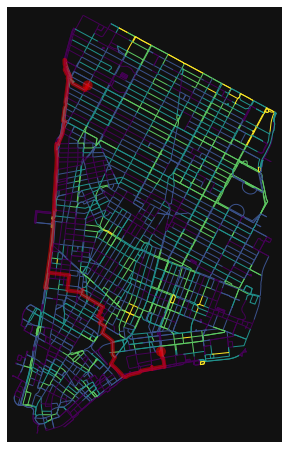

In [75]:
ec = ox.plot.get_edge_colors_by_attr(G, attr='danger', num_bins=5)

# Plot route colored by danger
route = ox.shortest_path(G, orig, dest, weight="danger")

fig, ax = ox.plot_graph_route(G, route, node_size=0, edge_color=ec)
ax.scatter(G.nodes[orig]["x"], G.nodes[orig]["y"], marker="x", c="red")
ax.scatter(G.nodes[dest]["x"], G.nodes[dest]["y"], marker="x", c="red")
plt.show()

Not what I wanted, but still looks cool. From [this StackOverflow post](https://stackoverflow.com/questions/64396130/how-do-i-specify-colors-for-the-individual-edges-of-a-route-in-osmnx) you need to do the route color-coding manually

In [76]:
node_pairs = list(zip(route[:-1], route[1:]))

In [77]:
dangers = [G.get_edge_data(*i)[0]["danger"] for i in node_pairs]

In [78]:
danger_colors = [
    "b" if i < 1
    else "r" if i > 3
    else "y"
    for i in dangers
]

In [79]:
node_pairs = zip(route[:-1], route[1:])

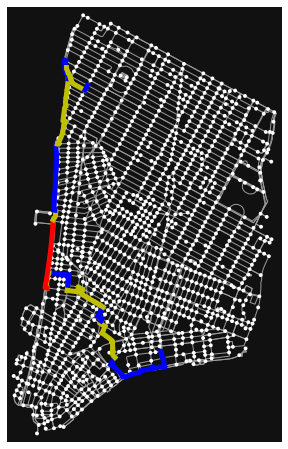

In [80]:
fig, ax = ox.plot_graph(G, show=False, close=False)

for (u, v), rc in zip(node_pairs, danger_colors):
    data = min(G.get_edge_data(u, v).values(), key=lambda d: d["danger"])
    if "geometry" in data:
        x, y = data["geometry"].xy
    else:
        x = G.nodes[u]["x"], G.nodes[v]["x"]
        y = G.nodes[u]["y"], G.nodes[v]["y"]
    ax.plot(x, y, color=rc, lw=5)

In [81]:
node_pairs = list(zip(route[:-1], route[1:]))

x = np.array([])
y = np.array([])

for (u, v) in node_pairs:
    data = min(G.get_edge_data(u, v).values(), key=lambda d: d["danger"])
    
    if "geometry" in data:
        _x, _y = data["geometry"].xy
        x = np.append(x, _x)
        y = np.append(y, _y)
        
    else:
        x = np.append(x, G.nodes[u]["x"], G.nodes[v]["x"])
        y = np.append(y, G.nodes[u]["y"], G.nodes[v]["y"])
        
points = np.array([x, y]).T.reshape(-1, 1, 2)

segments = np.concatenate([points[:-1], points[1:]], axis=1)

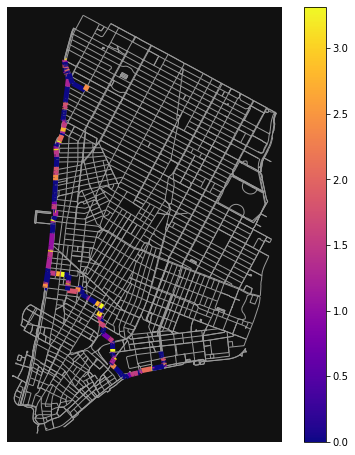

In [82]:
fig, ax = ox.plot_graph(G, show=False, close=False, node_size=0)

norm = plt.Normalize(np.array(dangers).min(), np.array(dangers).max())
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(np.array(dangers))
lc.set_linewidth(5)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

plt.show()

In [83]:
route = ox.shortest_path(G, orig, dest, weight="length")

In [84]:
node_pairs = list(zip(route[:-1], route[1:]))
dangers = [G.get_edge_data(*i)[0]["danger"] for i in node_pairs]

In [85]:
node_pairs = list(zip(route[:-1], route[1:]))

x = np.array([])
y = np.array([])

for (u, v) in node_pairs:
    data = min(G.get_edge_data(u, v).values(), key=lambda d: d["danger"])
    
    if "geometry" in data:
        _x, _y = data["geometry"].xy
        x = np.append(x, _x)
        y = np.append(y, _y)
        
    else:
        x = np.append(x, G.nodes[u]["x"], G.nodes[v]["x"])
        y = np.append(y, G.nodes[u]["y"], G.nodes[v]["y"])
        
points = np.array([x, y]).T.reshape(-1, 1, 2)

segments = np.concatenate([points[:-1], points[1:]], axis=1)

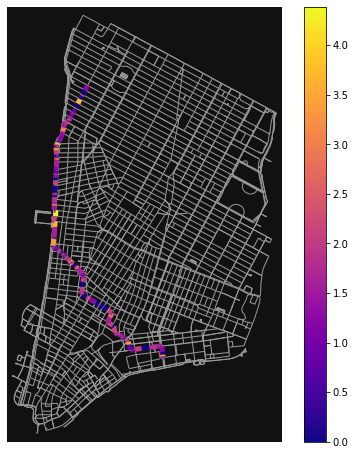

In [86]:
fig, ax = ox.plot_graph(G, show=False, close=False, node_size=0)

norm = plt.Normalize(np.array(dangers).min(), np.array(dangers).max())
lc = LineCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(np.array(dangers))
lc.set_linewidth(5)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

plt.show()

## Danger by road type
Now, we want to compute the average danger for all roads(edges) of the same type

In [88]:
edge_dangers = nx.get_edge_attributes(G, "danger")
edge_roads = nx.get_edge_attributes(G, "highway")

In [118]:
cycleway_dangers = {}
other_road_dangers = {}
zero_dangers = {}

for edge in edge_roads.keys():
    if edge_roads[edge] == "cycleway":# and edge_dangers[edge] > 0:
        cycleway_dangers[edge] = edge_dangers[edge]
        
    elif edge_roads[edge] != "cycleway" and edge_dangers[edge] > 0:
        other_road_dangers[edge] = edge_dangers[edge]
        
    else:
        zero_dangers[edge] = edge_dangers[edge]

In [119]:
sum(cycleway_dangers.values()) / len(cycleway_dangers)

2.322675059096066

In [120]:
len(cycleway_dangers)

234

In [121]:
sum(other_road_dangers.values()) / len(other_road_dangers)

2.5327528190226136

In [122]:
len(other_road_dangers)

2376

In [123]:
sum(zero_dangers.values()) / len(zero_dangers)

0.0

In [124]:
len(zero_dangers)

663

In [125]:
(sum(busy_road_dangers.values()) + sum(other_dangers.values())) / (len(busy_road_dangers) + len(other_dangers))

1.9487761327712896

In [126]:
sum(edge_dangers.values()) / len(edge_dangers)

2.0046827564394136

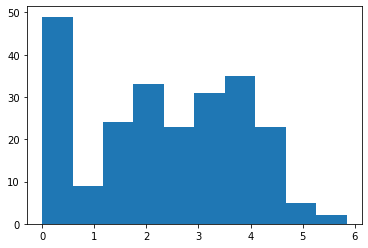

In [127]:
plt.figure()
plt.hist(cycleway_dangers.values())
plt.show()

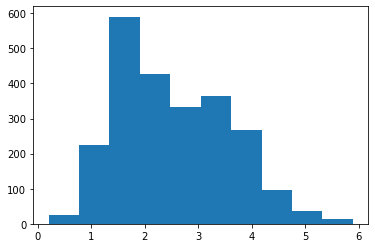

In [128]:
plt.figure()
plt.hist(other_road_dangers.values())
plt.show()